In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_dir = "/Users/hidehisa/.kaggle/competitions/plasticc/"
os.listdir(data_dir)

['test_set_metadata.csv.zip',
 '.DS_Store',
 'data_note.pdf',
 'test_set_sample.csv.zip',
 'training_set.csv',
 'test_set_metadata.csv',
 'data_note.pdf.zip',
 'training_set_metadata.csv',
 'training_set.csv.zip',
 'sample_submission.csv.zip']

# データ読み込み

In [3]:
meta = pd.read_csv(f"{data_dir}training_set_metadata.csv")
train = pd.read_csv(f"{data_dir}training_set.csv")

In [4]:
meta.shape, train.shape

((7848, 12), (1421705, 6))

In [5]:
meta.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [6]:
train.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421705 entries, 0 to 1421704
Data columns (total 6 columns):
object_id    1421705 non-null int64
mjd          1421705 non-null float64
passband     1421705 non-null int64
flux         1421705 non-null float64
flux_err     1421705 non-null float64
detected     1421705 non-null int64
dtypes: float64(3), int64(3)
memory usage: 65.1 MB


## target毎の数は？

In [8]:
meta.groupby("target")["object_id"].count()

target
6      151
15     495
16     924
42    1193
52     183
53      30
62     484
64     102
65     981
67     208
88     370
90    2313
92     239
95     175
Name: object_id, dtype: int64

## targetが90のやつだけ見てみる

In [9]:
target90 = meta.query("target == 90")["object_id"]
target90.head()

3      745
4     1124
6     1598
8     1920
10    2072
Name: object_id, dtype: int64

# object毎に見ていく

In [10]:
obj745 = train.query("object_id == 745")
obj745.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,351.0,351.000000,351.000000,351.000000,351.000000,351.000000
mean,745.0,60199.831697,2.378917,8.909206,2.555576,0.173789
std,0.0,306.144145,1.747328,27.558208,3.537324,0.379469
min,745.0,59770.366200,0.000000,-15.494463,0.567170,0.000000
25%,745.0,59872.024650,1.000000,-0.695045,1.249489,0.000000
50%,745.0,60200.073700,2.000000,1.035895,1.819875,0.000000
75%,745.0,60538.185950,4.000000,5.282239,2.675502,0.000000
max,745.0,60624.072200,5.000000,220.795212,55.892746,1.000000


In [11]:
obj745.head(20)

,object_id,mjd,passband,flux,flux_err,detected
1032,745,59770.3662,2,0.161398,0.619084,0
1033,745,59770.3740,1,-0.699347,0.602597,0
1034,745,59770.3817,3,-1.623621,1.051044,0
1035,745,59770.3928,4,2.732148,1.807272,0
1036,745,59770.4039,5,0.529565,4.609781,0
1037,745,59779.3999,2,2.314143,2.049559,0
1038,745,59779.4075,1,3.819682,2.775676,0
1039,745,59779.4151,3,7.149204,2.455586,0
1040,745,59779.4261,4,-0.612280,3.263342,0
1041,745,59779.4370,5,12.491076,8.552037,0


In [12]:
obj745_p1 = obj745.query("passband == 1")
obj745_p1.head(10)

,object_id,mjd,passband,flux,flux_err,detected
1033,745,59770.3740,1,-0.699347,0.602597,0
1038,745,59779.4075,1,3.819682,2.775676,0
1043,745,59782.2450,1,1.318436,1.148711,0
1048,745,59797.3412,1,1.198866,0.947047,0
1053,745,59800.2406,1,3.329584,3.300306,0
1058,745,59808.2301,1,-3.618410,1.775791,0
1063,745,59811.1357,1,-1.093970,0.967427,0
1068,745,59814.1283,1,-0.538179,0.886799,0
1079,745,59826.3650,1,-0.312060,1.010161,0
1084,745,59836.1479,1,1.089473,1.998819,0


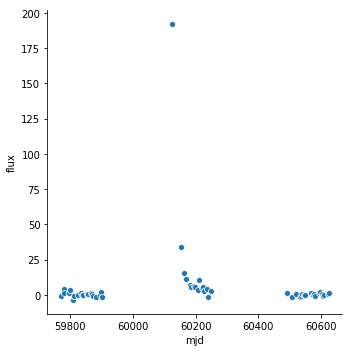

In [13]:
sns.relplot(x='mjd', y='flux', data=obj745_p1)

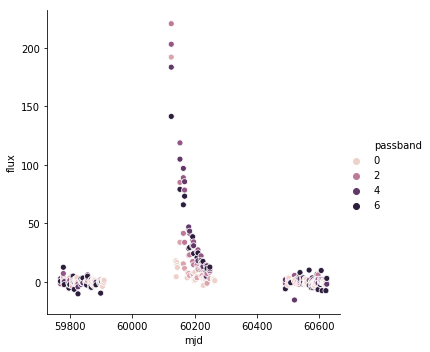

In [14]:
sns.relplot(x='mjd', y='flux', hue='passband', data=obj745)

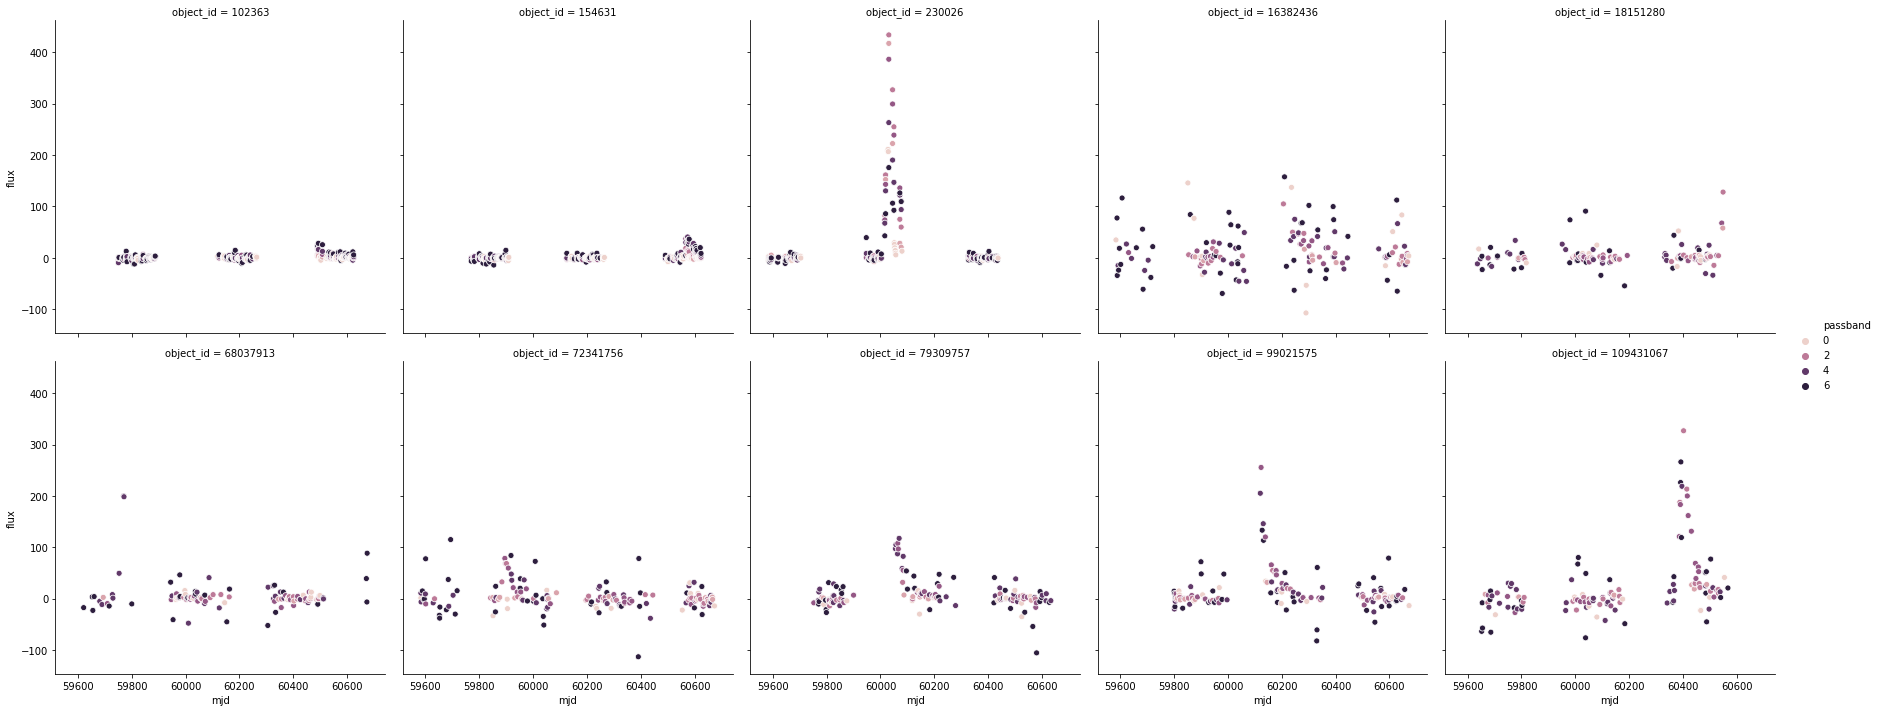

In [26]:
random10_selection = train[train.object_id.isin(np.random.choice(target90, 10).tolist())]
sns.relplot(x="mjd", y="flux", hue="passband",
            col="object_id", col_wrap=5, data=random10_selection)

# 他のtargetも同様にしてみてみる

In [27]:
meta.target.unique()

array([92, 88, 42, 90, 65, 16, 67, 95, 62, 15, 52,  6, 64, 53])

In [28]:
target92 = meta.query("target == 92")["object_id"]
target88 = meta.query("target == 88")["object_id"]
target42 = meta.query("target == 42")["object_id"]
target65 = meta.query("target == 65")["object_id"]
target16 = meta.query("target == 16")["object_id"]
target67 = meta.query("target == 67")["object_id"]
target95 = meta.query("target == 95")["object_id"]
target62 = meta.query("target == 62")["object_id"]
target15 = meta.query("target == 15")["object_id"]
target52 = meta.query("target == 52")["object_id"]
target6 = meta.query("target == 6")["object_id"]
target64 = meta.query("target == 64")["object_id"]
target53 = meta.query("target == 53")["object_id"]

In [29]:
def plot_per_target(target):
    random10_selection = train[train.object_id.isin(np.random.choice(target, 10).tolist())]
    sns.relplot(x="mjd", y="flux", hue="passband",
                col="object_id", col_wrap=5, data=random10_selection)

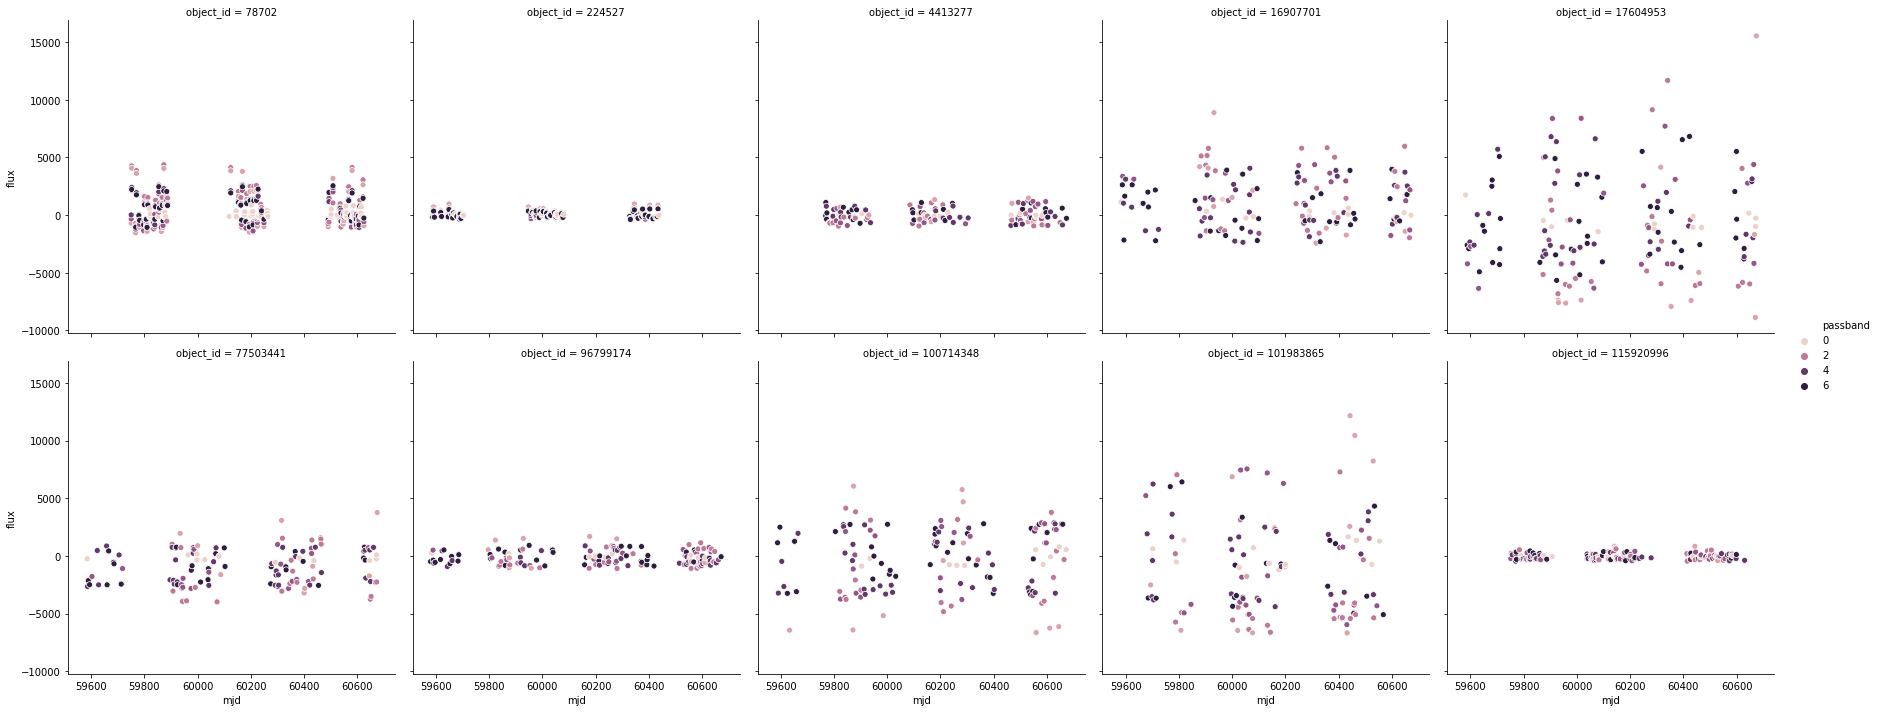

In [30]:
plot_per_target(target92)

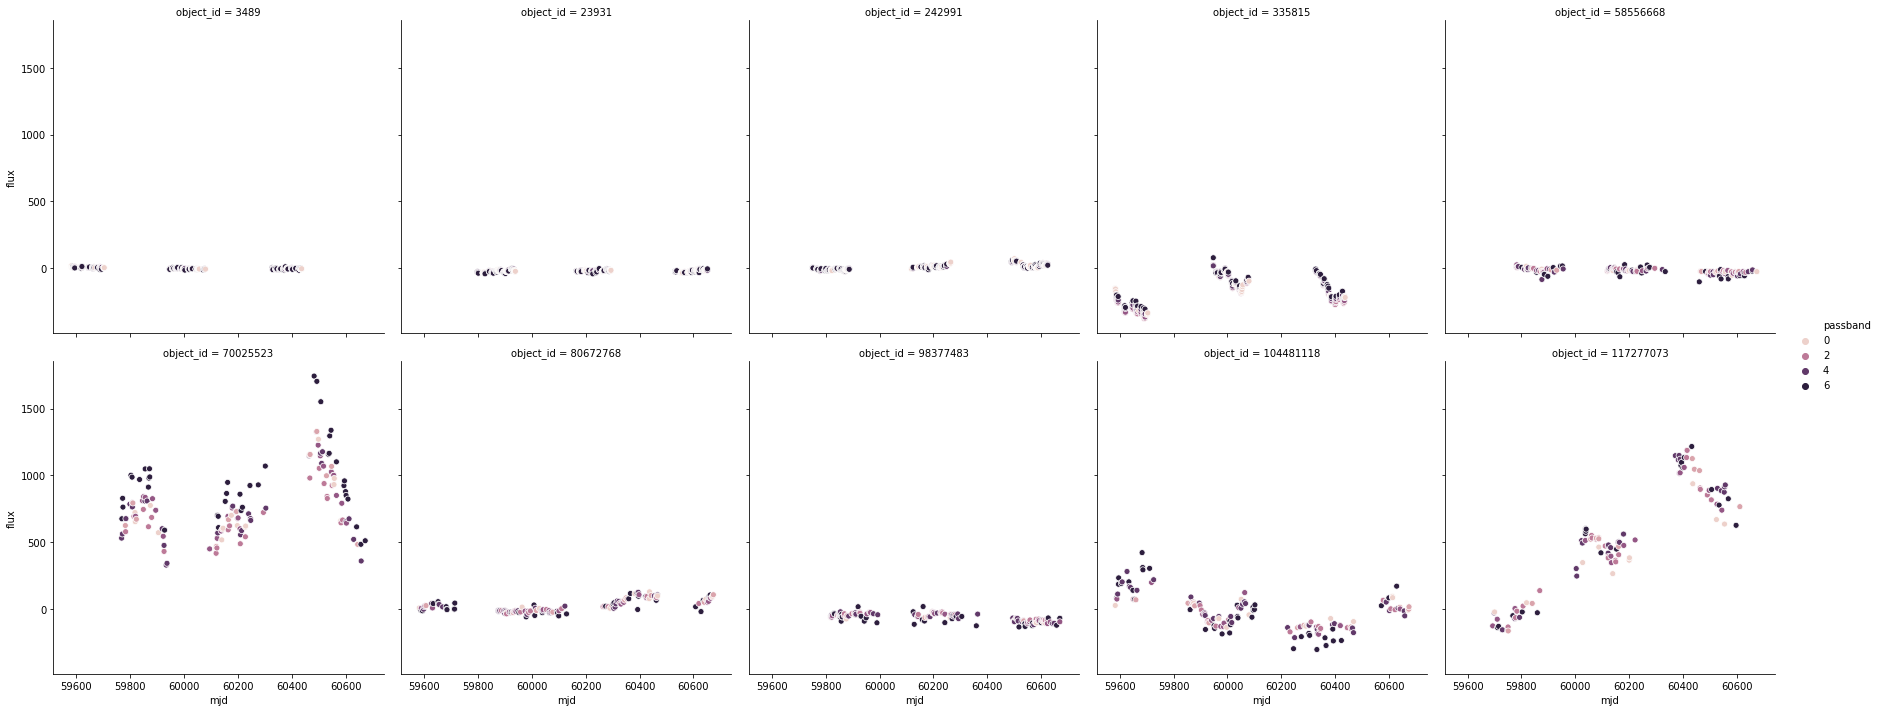

In [31]:
plot_per_target(target88)

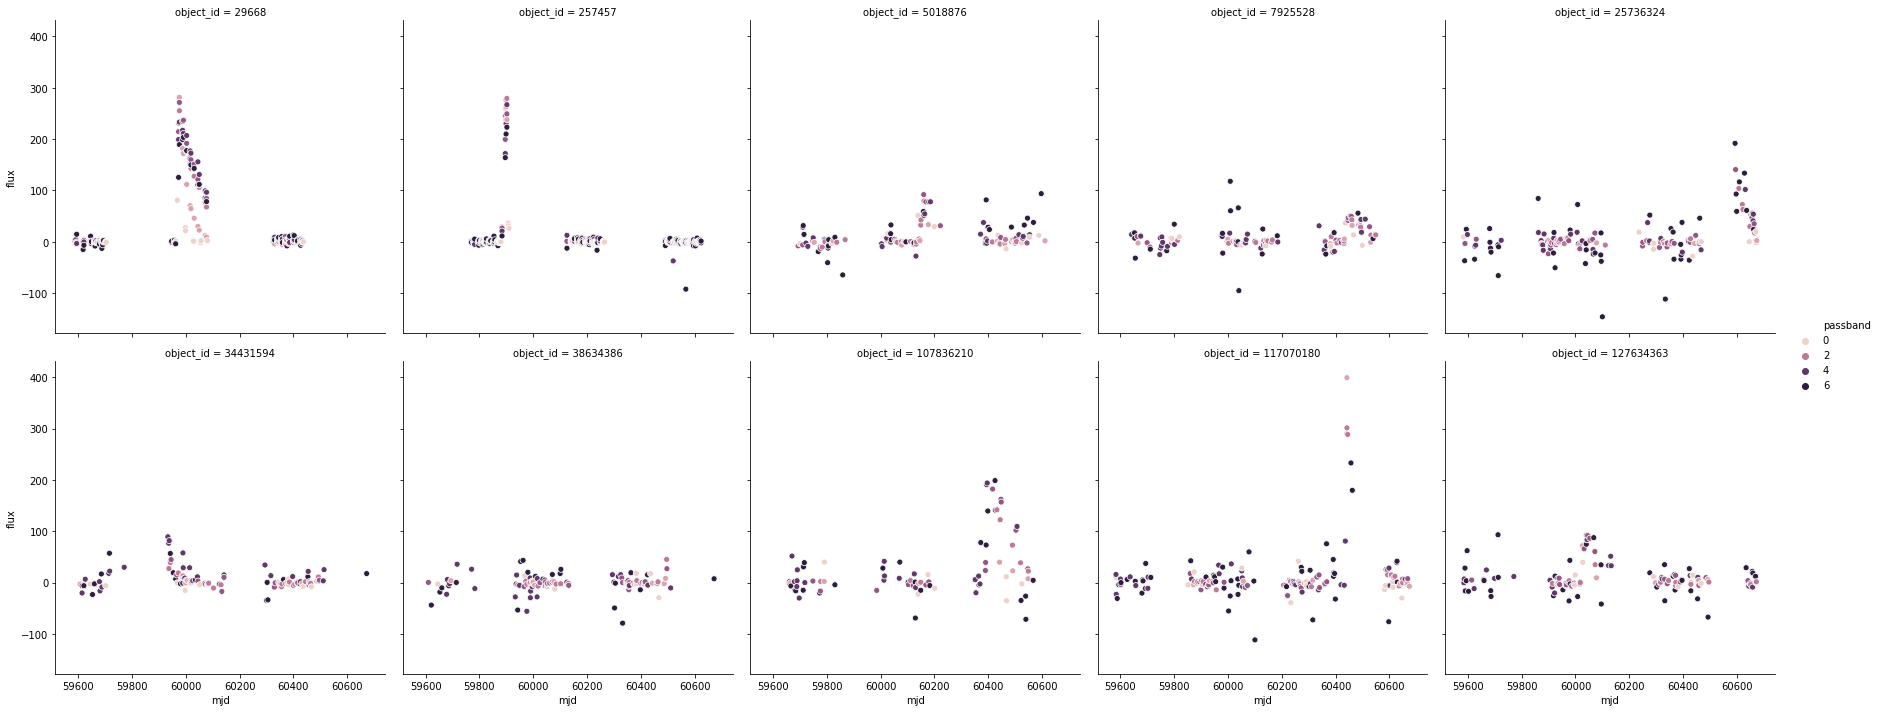

In [32]:
plot_per_target(target42)

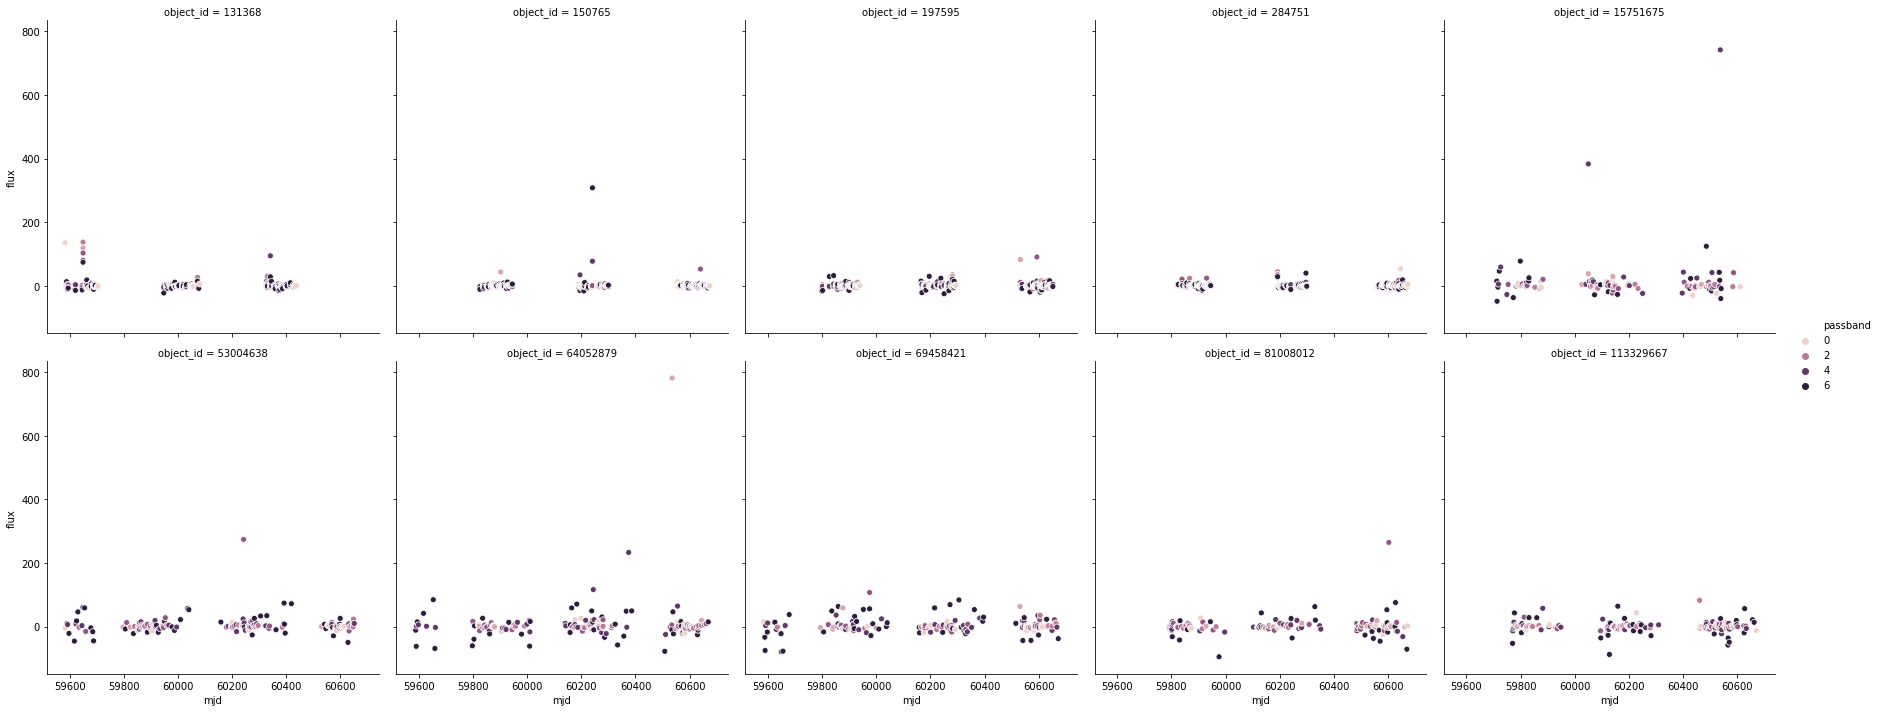

In [33]:
plot_per_target(target65)

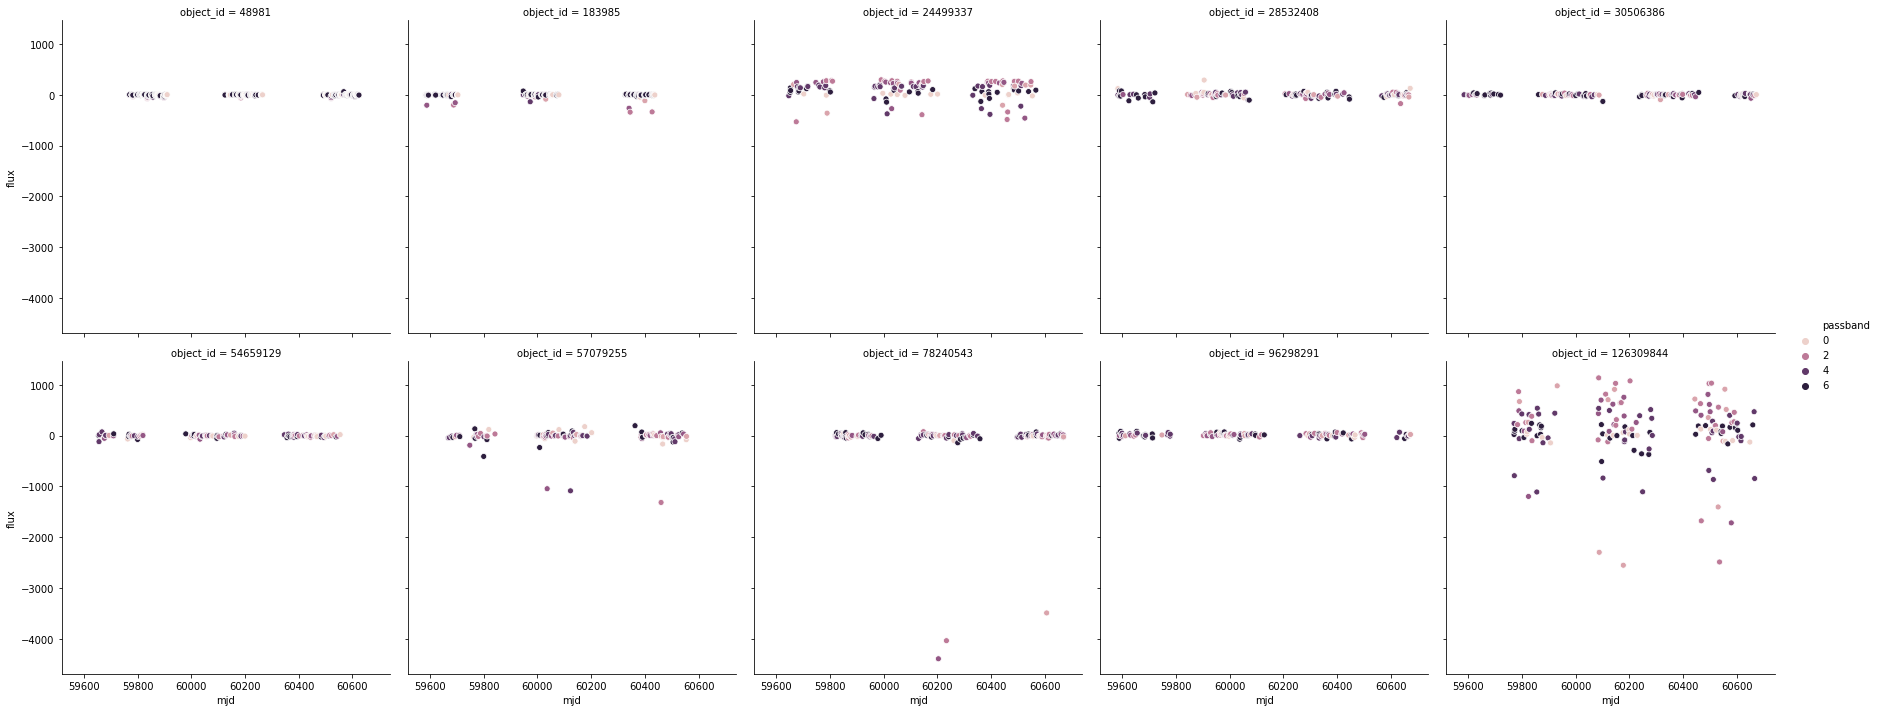

In [34]:
plot_per_target(target16)

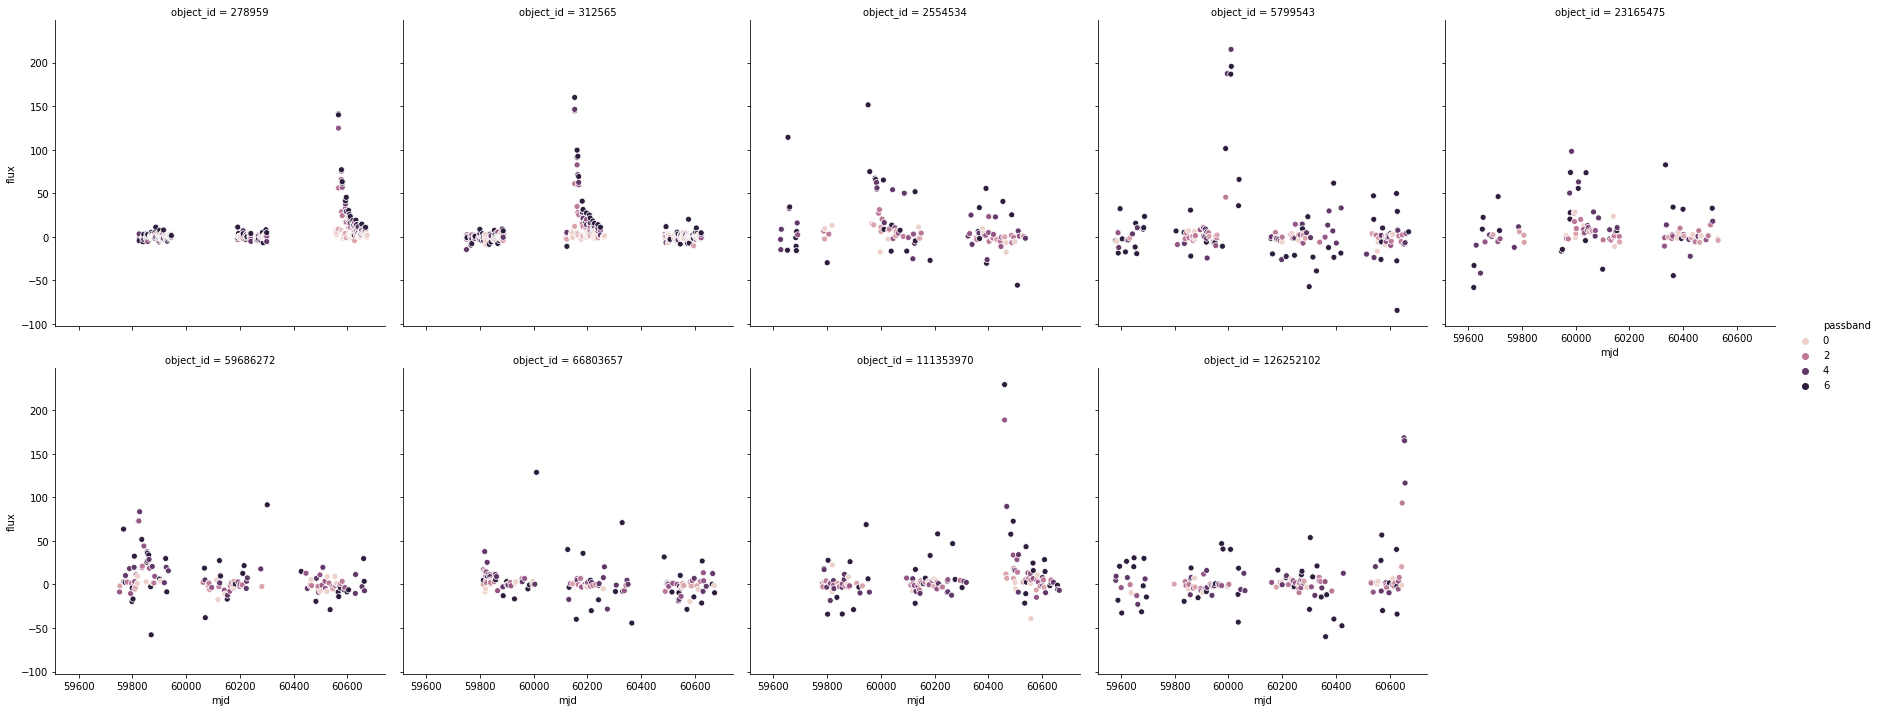

In [35]:
plot_per_target(target67)

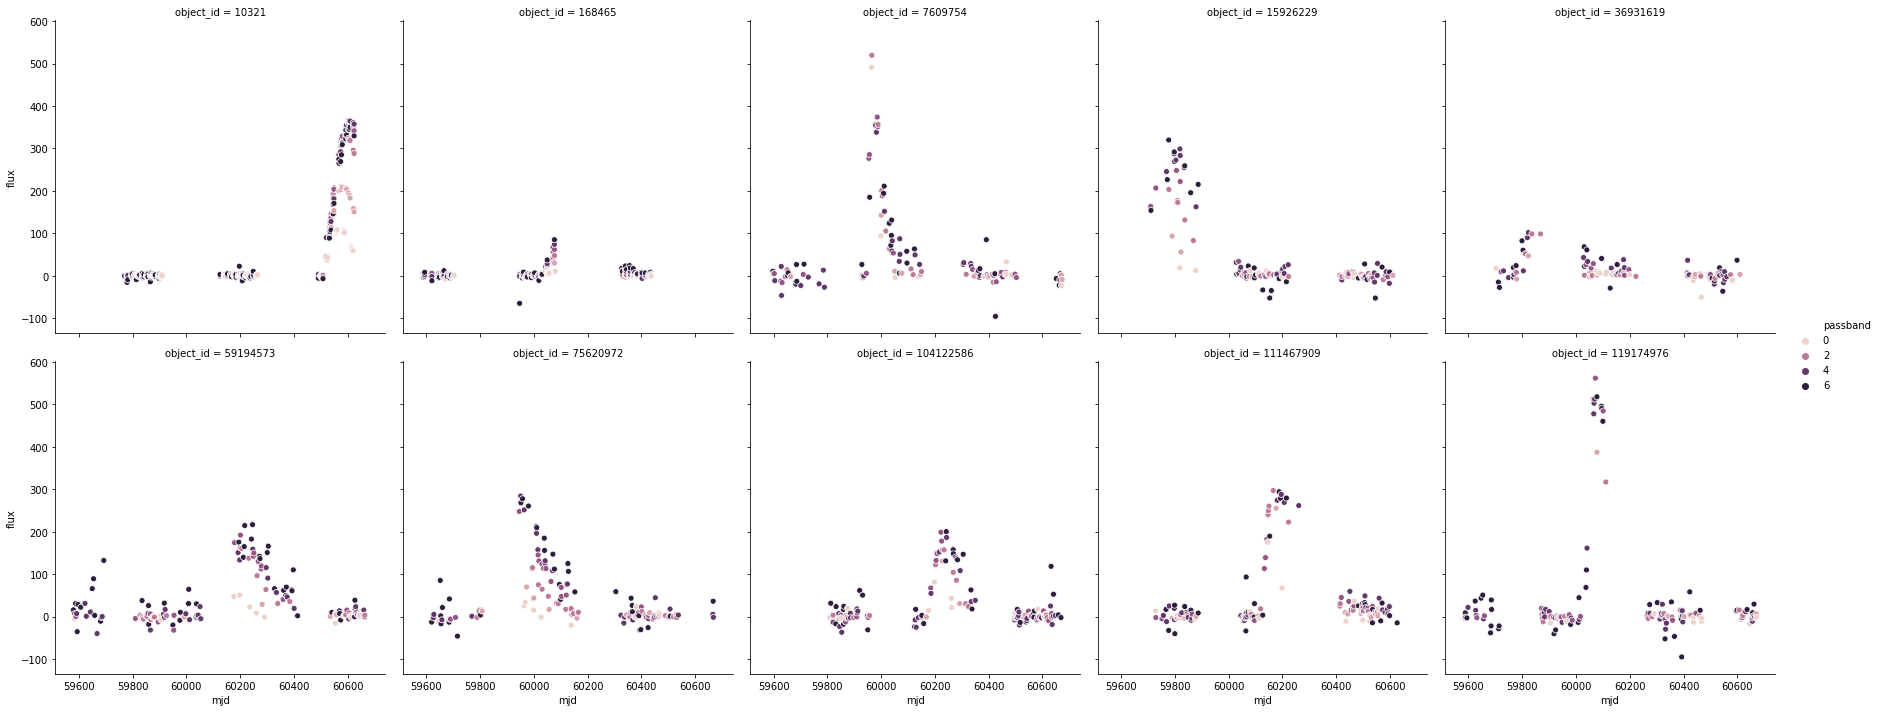

In [36]:
plot_per_target(target95)

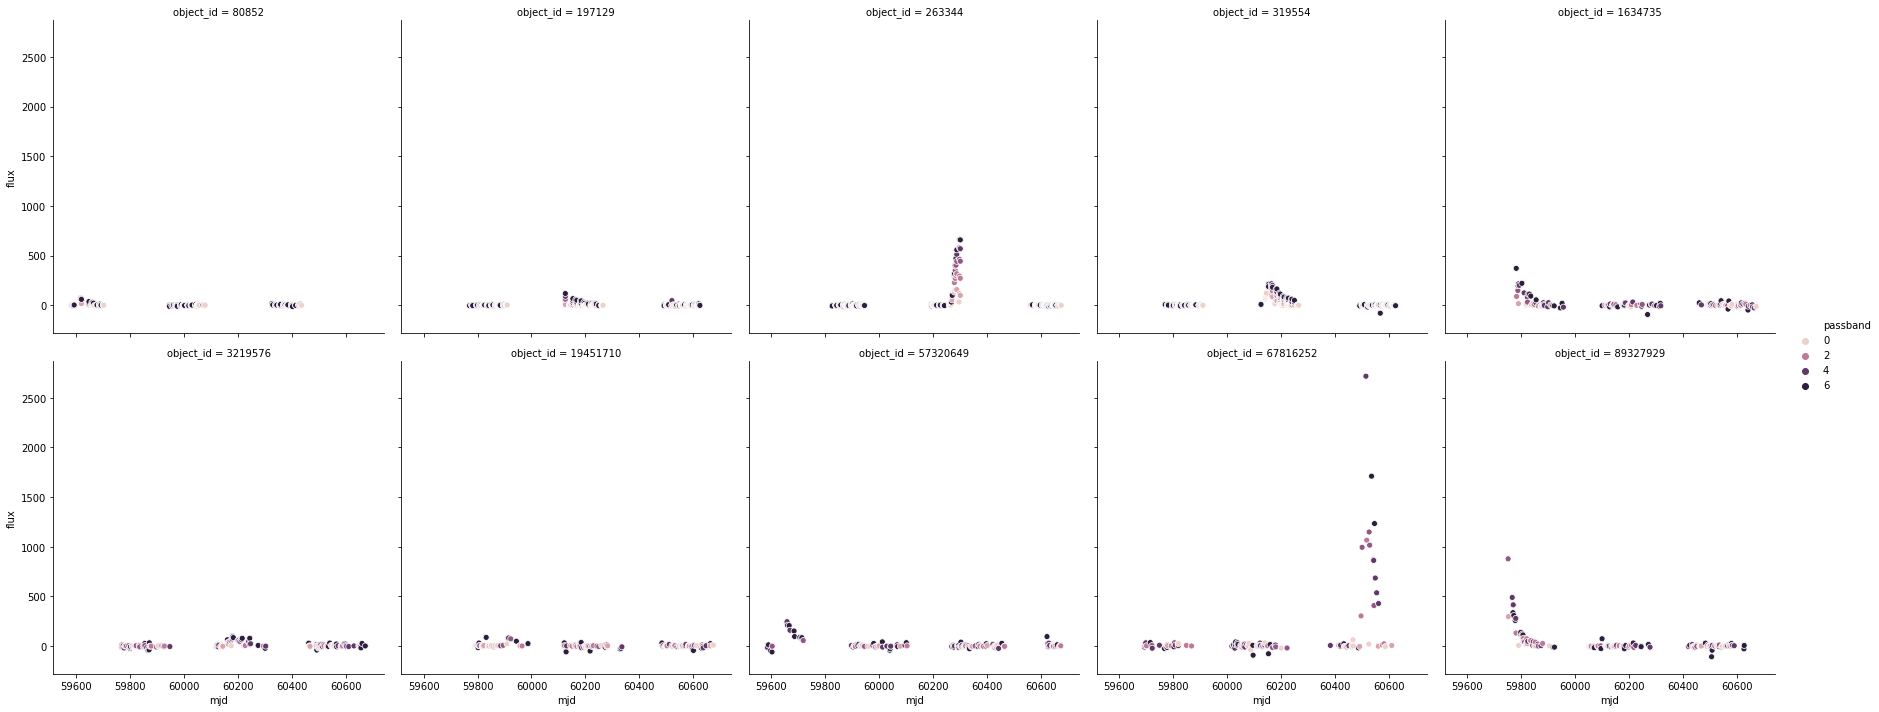

In [37]:
plot_per_target(target62)

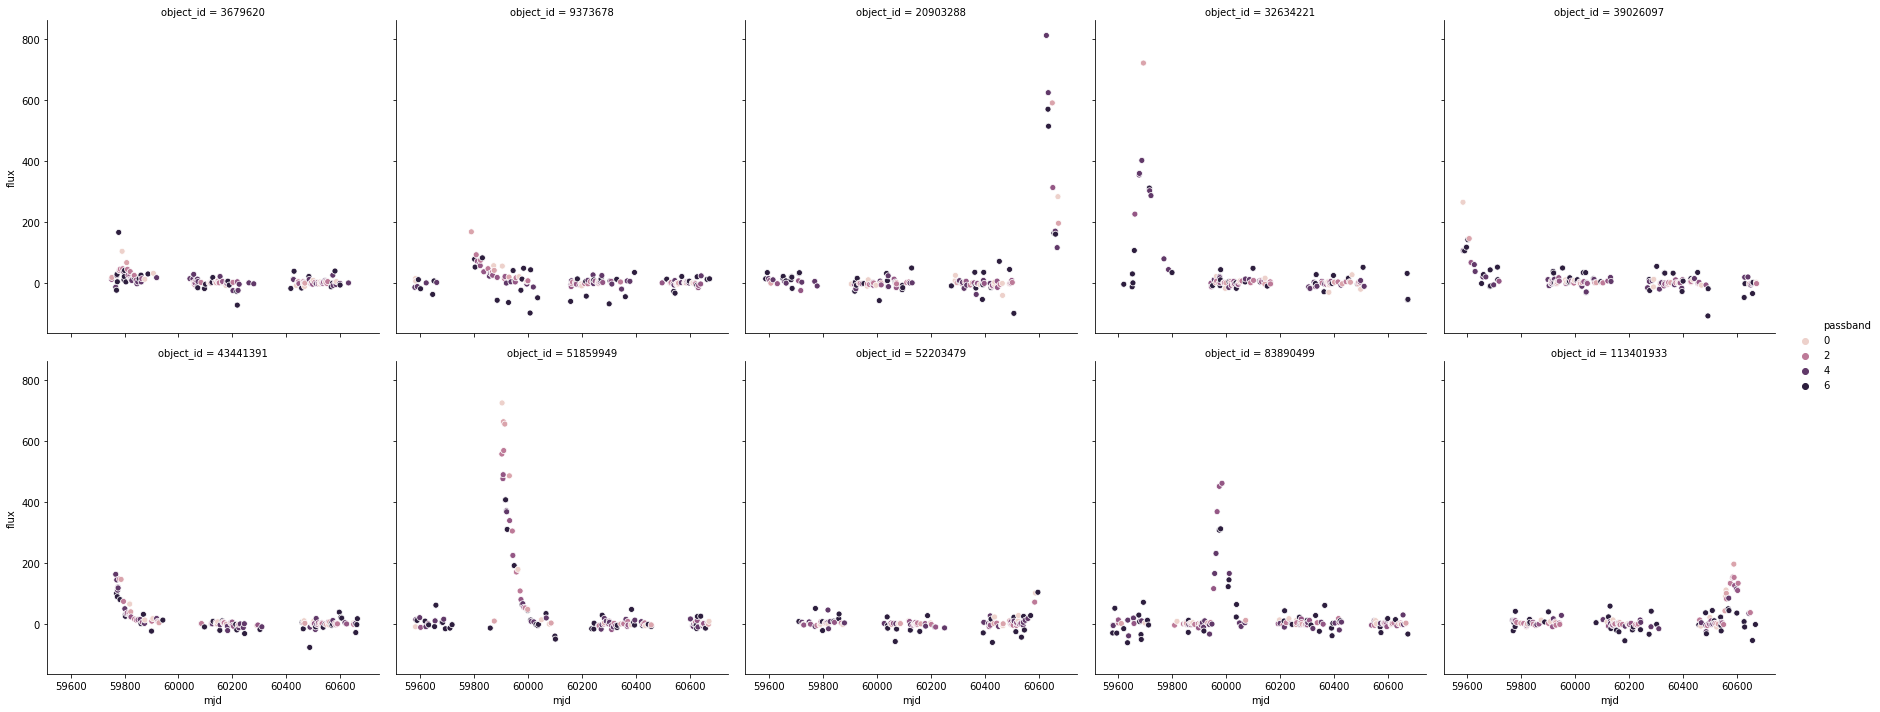

In [38]:
plot_per_target(target15)

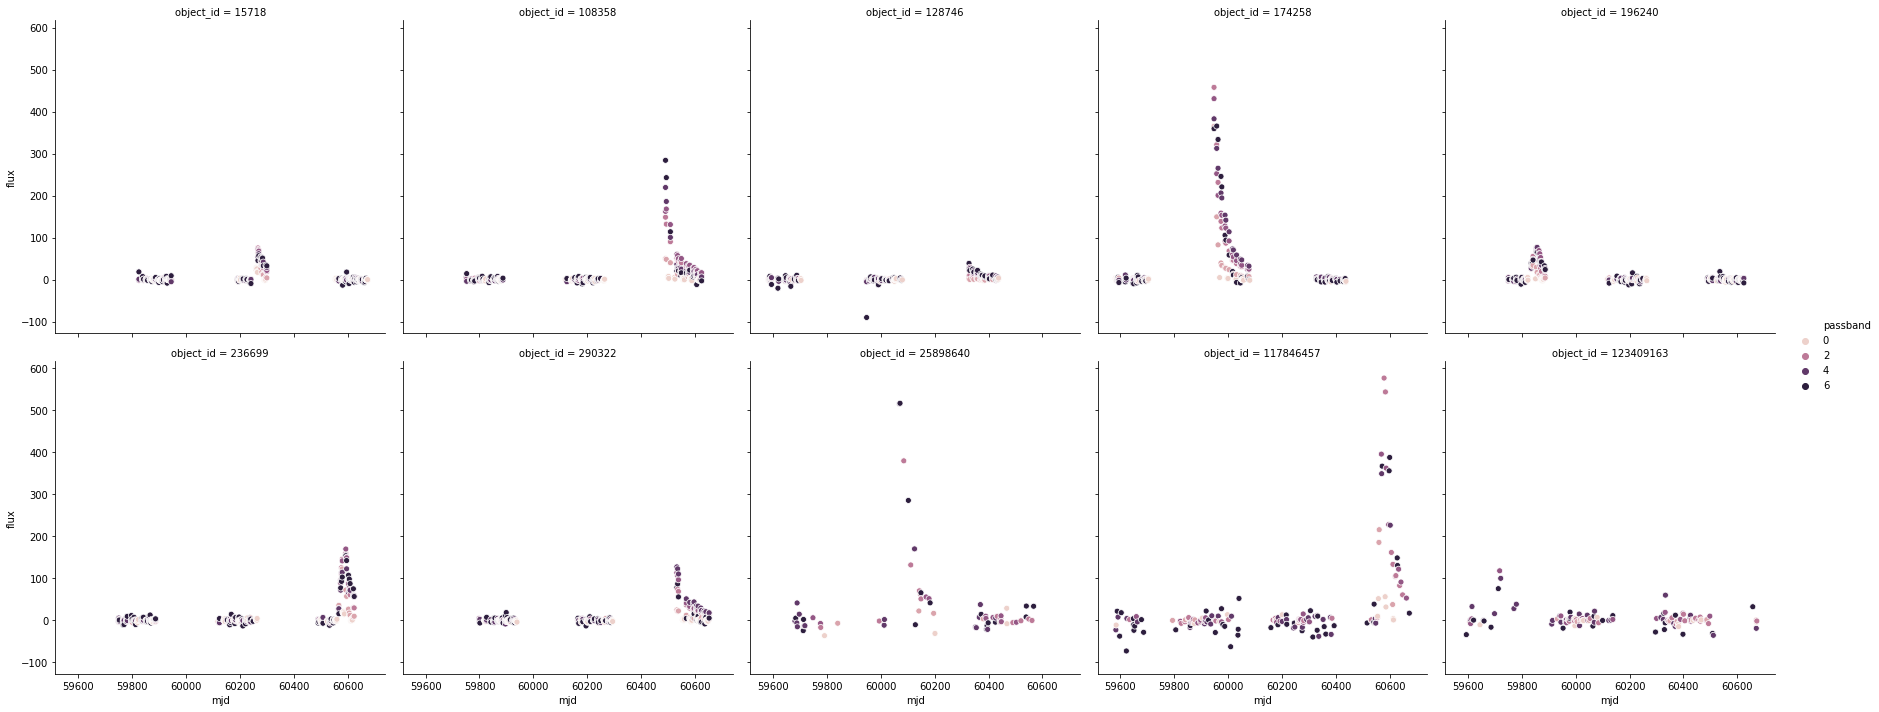

In [39]:
plot_per_target(target52)

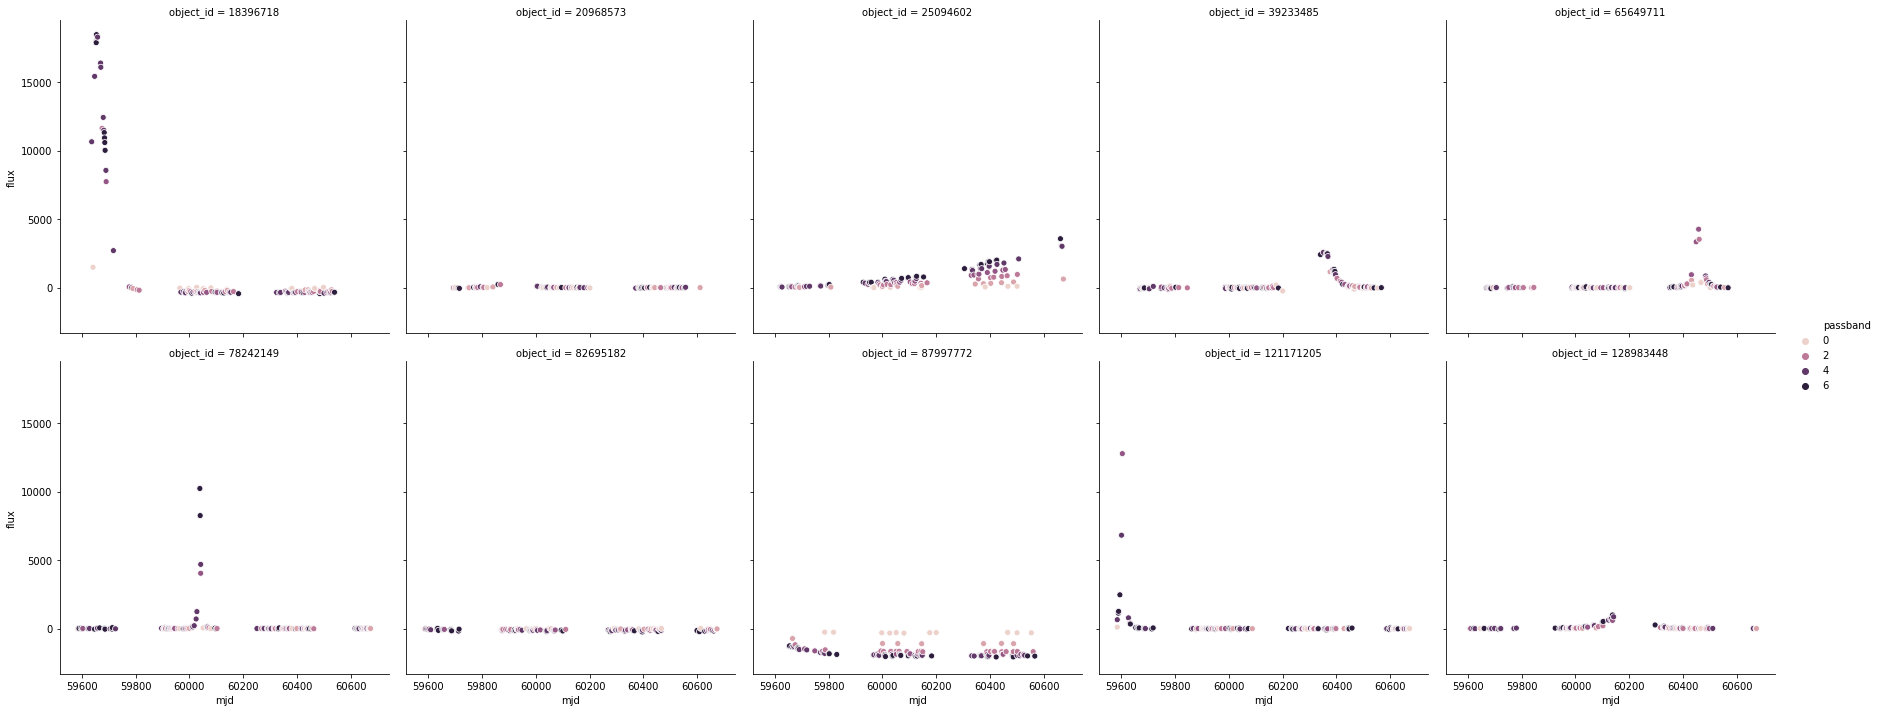

In [40]:
plot_per_target(target6)

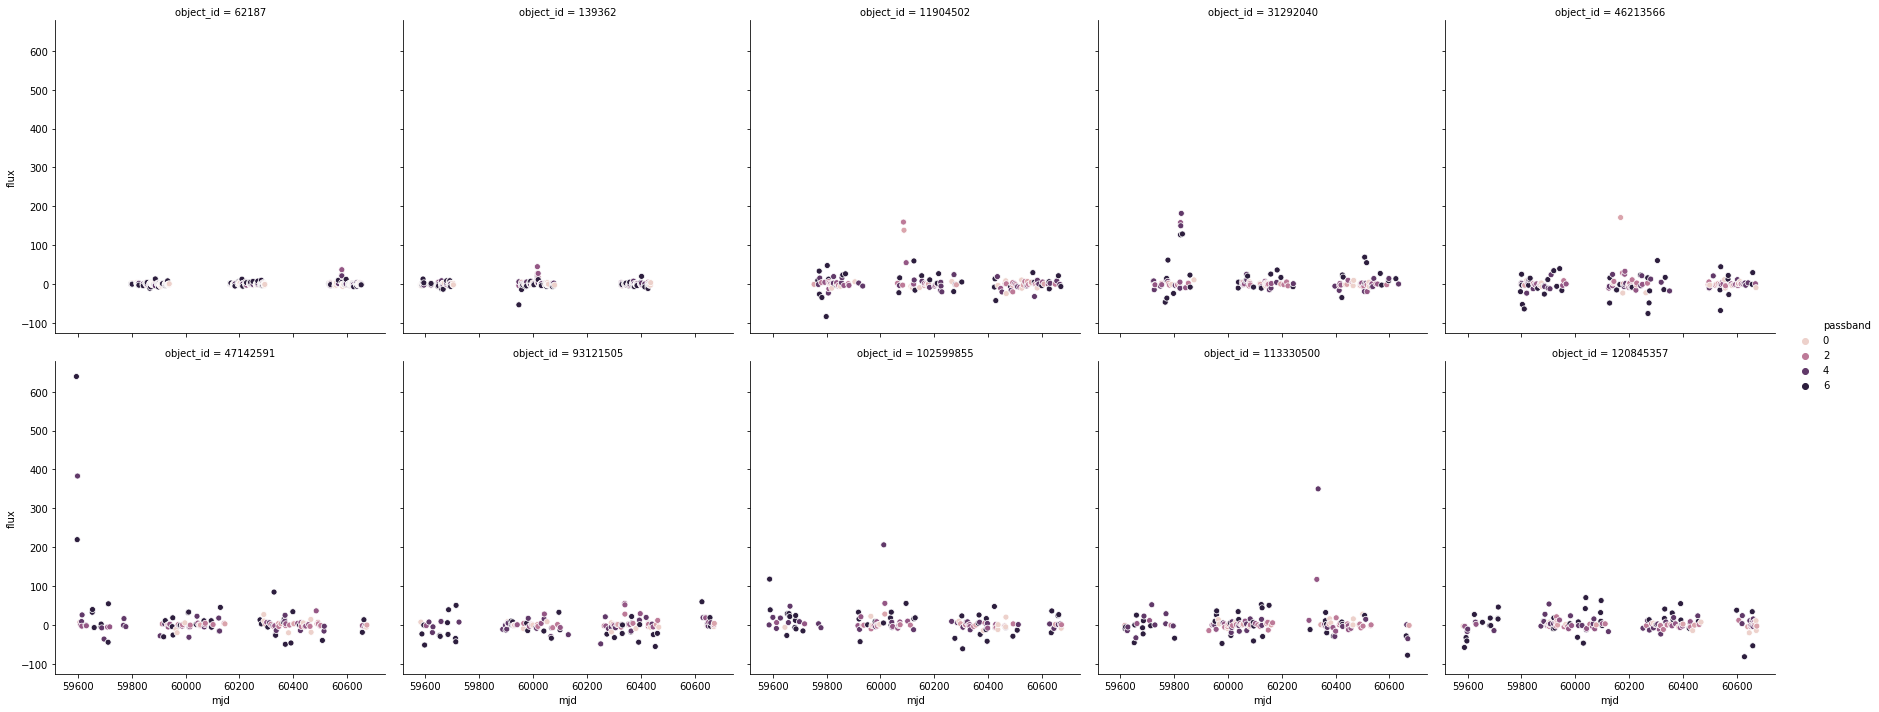

In [41]:
plot_per_target(target64)

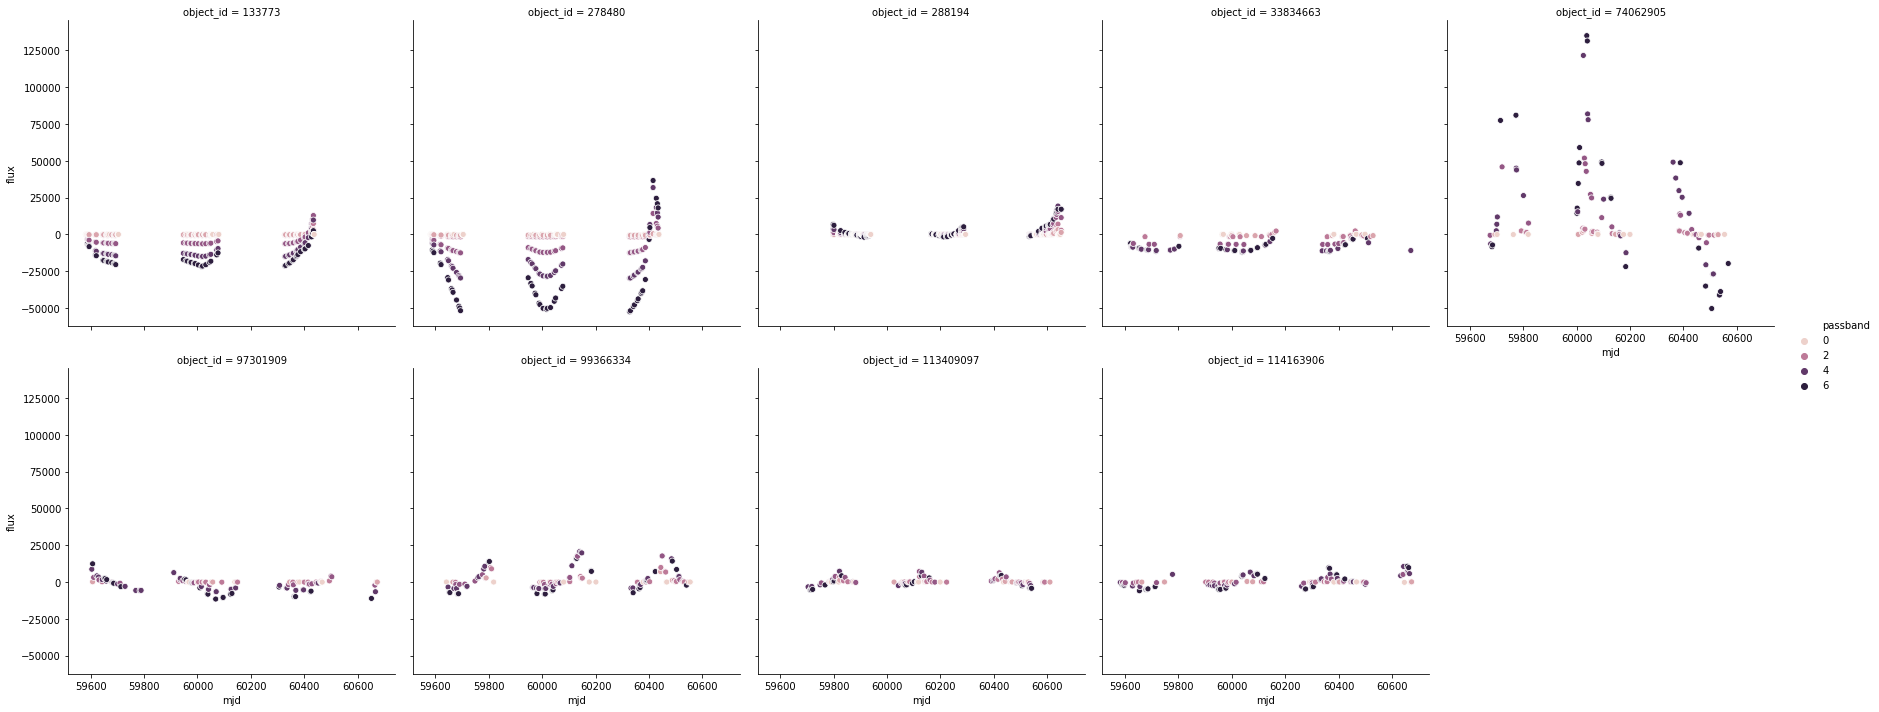

In [42]:
plot_per_target(target53)

# 観測があった時間毎にクラスタリングできない？

In [43]:
from sklearn.cluster import KMeans

In [44]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=42)

In [46]:
km.fit_predict(obj745.mjd.values.reshape([-1, 1]))

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [71]:
from scipy import stats

class XMeans:
    def __init__(self, k_init=2, **k_means_args):
        self.k_init = k_init
        self.k_means_args = k_means_args
    
    def fit(self, X):
        self.__clusters = []
        
        clusters = self.Cluster.build(X, KMeans(self.k_init, **self.k_means_args).fit(X))
        self.__recursively_split(clusters)
        
        self.labels_ = np.empty(X.shape[0], dtype=np.intp)
        for i, c in enumerate(self.__clusters):
            self.labels_[c.index] = i
            
        self.cluster_centers_ = np.array([c.center for c in self.__clusters])
        self.cluster_log_likelihoods_ = np.array([c.log_likelihood() for c in self.__clusters])
        self.cluster_sizes_ = np.array([c.size for c in self.__clusters])
        
        return self
    
    def __recursively_split(self, clusters):
        for cluster in clusters:
            if cluster.size <= 3:
                self.__clusters.append(cluster)
                continue
            k_means = KMeans(2, **self.k_means_args).fit(cluster.data)
            c1, c2 = self.Cluster.build(cluster.data, k_means, cluster.index)
            
            beta = np.linalg.norm(c1.center - c2.center) / np.sqrt(c1.cov + c2.cov)
            alpha = 0.5 / stats.norm.cdf(beta)
            bic = -2 * (cluster.size * np.log(alpha) + 
                        c1.log_likelihood() + c2.log_likelihood()) + 2 * cluster.df * np.log(cluster.size)
            
            if bic < cluster.bic():
                self.__recursively_split([c1, c2])
            else:
                self.__clusters.append(cluster)
        
    class Cluster:
        @classmethod
        def build(cls, X, k_means, index=None):
            if type(index) == type(None):
                index = np.array(range(0, X.shape[0]))
            labels = range(0, k_means.get_params()["n_clusters"])
            return tuple(cls(X, index, k_means, label) for label in labels)
        
        def __init__(self, X, index, k_means, label):
            self.data = X[k_means.labels_ == label]
            self.index = index[k_means.labels_ == label]
            self.size = self.data.shape[0]
            self.df = self.data.shape[1] * (self.data.shape[1] + 3) / 2
            self.center = k_means.cluster_centers_[label]
            self.cov = np.cov(self.data.T)
            
        def log_likelihood(self):
            return sum(
                stats.multivariate_normal.logpdf(x, self.center, self.cov)
                for x in self.data
            )
        
        def bic(self):
            return -2 * self.log_likelihood() + self.df * np.log(self.size)

In [72]:
x_means = XMeans(random_state=42).fit(obj745.mjd.values.reshape([-1, 1]))
x_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [81]:
xmeans = XMeans(random_state=42).fit(train.query("object_id == 615").mjd.values.reshape([-1, 1]))
xmeans.labels_

array([ 8,  8,  8,  8,  7,  7,  7,  7,  7, 10, 10, 10, 10, 10,  9,  9,  9,
        9,  9, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13

In [84]:
train.query("object_id == 713").mjd

352    59825.2600
353    59825.2676
354    59825.2752
355    59825.2862
356    59825.2971
357    59839.2161
358    59839.2236
359    59839.2313
360    59839.2422
361    59839.2532
362    59842.1987
363    59842.2064
364    59842.2140
365    59842.2250
366    59842.2359
367    59851.2006
368    59854.2089
369    59854.2165
370    59854.2242
371    59854.2351
372    59854.2461
373    59857.1879
374    59857.1956
375    59857.2032
376    59857.2141
377    59857.2251
378    59867.1600
379    59867.1676
380    59867.1753
381    59867.1862
          ...    
672    60649.0561
673    60651.1265
674    60651.1451
675    60651.1527
676    60651.1637
677    60651.1746
678    60654.0597
679    60654.0673
680    60654.0749
681    60654.0859
682    60654.0968
683    60662.1451
684    60662.1527
685    60662.1603
686    60662.1713
687    60662.1822
688    60665.0637
689    60665.0713
690    60665.0789
691    60665.1017
692    60665.1156
693    60668.0647
694    60668.0723
695    60668.0893
696    606

## クラスタ番号を割り振る

In [74]:
dfs = []
for obj_id in train.object_id.unique():
    obj = train.query("object_id == @obj_id")
    xmeans = XMeans(random_state=42).fit(obj.mjd.values.reshape([-1, 1]))
    obj["cluster"] = xmeans.labels_
    dfs.append(obj)
train = pd.concat(dfs)

/Users/hidehisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/hidehisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: Degrees of freedom <= 0 for slice
/Users/hidehisa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/hidehisa/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: array must not contain infs or NaNs

In [79]:
train.object_id.unique()

array([      615,       713,       730, ..., 130762946, 130772921,
       130779836])